#  Lab 7: Sample and Empirical Distributions

Welcome to Lab 7 !

## Introduction
Topics to cover in this lab include:

#### 1. Sampling with Basketball Data
#### 2. Parameters and Statistics with Earthquakes


Run these cells below to import your modules and get started:


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


## 1. Sampling with Basketball Data

We will now introduce the topic of sampling, which we’ll be discussing in more depth in this week’s lectures. We’ll guide you through this code, but if you wish to read more about different kinds of samples before attempting this question, you can check out [section 10 of the textbook](https://www.inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html).

Run the cell below to load player and salary data that we will use for our sampling. 

In [ ]:
player_data = pd.read_csv("https://raw.githubusercontent.com/prabinspkt/data-science-files/main/player_data.csv")
salary_data = pd.read_csv("https://raw.githubusercontent.com/prabinspkt/data-science-files/main/salary_data.csv")
full_data = salary_data.join(player_data.set_index('Name'), on = "PlayerName")
full_data = full_data.reset_index()
full_data = full_data.drop(columns=['index'])

full_data

,PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
0,Kobe Bryant,23500000,36,LAL,35,199,197,47,7,128,782
1,Amar'e Stoudemire,23410988,32,TOT,59,329,45,29,38,78,680
2,Joe Johnson,23180790,33,BRK,80,384,292,59,14,137,1154
3,Carmelo Anthony,22458401,30,NYK,40,264,122,40,17,89,966
4,Dwight Howard,21436271,29,HOU,41,431,50,28,53,115,646
...,...,...,...,...,...,...,...,...,...,...,...
487,Sim Bhullar,29843,22,SAC,3,1,1,0,1,0,2
488,David Stockton,29843,23,SAC,3,2,9,2,0,4,8
489,David Wear,29843,24,SAC,2,2,1,0,0,0,0
490,Andre Dawkins,29843,23,MIA,4,2,1,0,0,1,3


Rather than getting data on every player (as in the tables loaded above), imagine that we had gotten data on only a smaller subset of the players. For 492 players, it's not so unreasonable to expect to see all the data, but usually we aren't so lucky. 

If we want to make estimates about a certain numerical property of the population (known as a statistic, e.g. the mean or median), we may have to come up with these estimates based only on a smaller sample. Whether these estimates are useful or not often depends on how the sample was gathered. We have prepared some example sample datasets to see how they compare to the full NBA dataset. Later we'll ask you to create your own samples to see how they behave.

To save typing and increase the clarity of your code, we will package the analysis code into a few functions. This will be useful in the rest of the lab as we will repeatedly need to create histograms and collect summary statistics from that data.

We've defined the `histograms` function below, which takes a table with columns `Age` and `Salary` and draws a histogram for each one. It uses bin widths of 1 year for `Age` and $1,000,000 for `Salary`.

In [ ]:
salaries = full_data['Salary'] / 1000000
full_data['Salary'] = salaries # drop the old salaries column and and divide

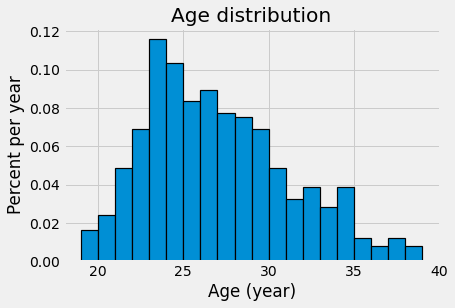

In [ ]:
def age_histogram(table):
    ages = table['Age']
    age_bins = np.arange(min(ages), max(ages) + 2, 1) 
    plt.hist(table.Age, age_bins,density=True, edgecolor = 'black', linewidth = 1.2) # denisty parameter gives us a relative distribution value
    plt.title('Age distribution')
    plt.xlabel("Age (year)")
    plt.ylabel("Percent per year")

age_histogram(full_data)

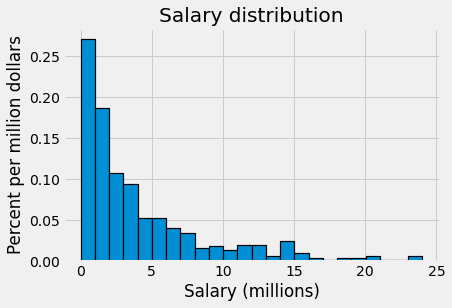

In [ ]:
def salary_histogram(table):
    salary_bins = np.arange(min(salaries), max(salaries) + 1, 1)
    plt.hist(table.Salary, salary_bins,density=True ,edgecolor = 'black', linewidth = 1.2) # denisty parameter gives us a relative distribution value
    plt.xlabel("Salary (millions)")
    plt.ylabel("Percent per million dollars")
    plt.title('Salary distribution') 
    
salary_histogram(full_data)

**Question 1:** Create a function called `compute_statistics` that takes a paramter called `ages_and_salaries` and returns a two-element array called `full_stats` containing the average age and average salary (in that order) of the `full_data` table.


In [ ]:
def compute_statistics(age_and_salary_data):
  age_col = age_and_salary_data["Age"]
  salary_col = age_and_salary_data["Salary"] 
  avg_age = sum(age_col)/len(age_col)
  avg_salary = sum(salary_col)/len(salary_col)
  return [avg_age, avg_salary]   

compute_statistics(full_data)

[26.536585365853657, 4.269775766260173]

### Convenience sampling
One sampling methodology, which is **generally a bad idea**, is to choose players who are somehow convenient to sample.  For example, you might choose players from one team who are near your house, since it's easier to survey them.  This is called, somewhat pejoratively, **convenience sampling**. 

**Note:** Convenience sampling is a kind of *deterministic sampling*

Suppose you survey only contains *relatively new* players with ages less than 22.  (The more experienced players didn't bother to answer your surveys about their salaries.)

**Question 2.**  Assign `convenience_sample` to a subset of `full_data` that contains only the rows for players under the age of 22.

In [ ]:
convenience_sample = full_data.loc[full_data["Age"] < 22]
convenience_sample

,PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
124,Anthony Davis,5.607240,21,NOP,68,696,149,100,200,95,1656
125,Anthony Bennett,5.563920,21,MIN,57,216,48,27,16,36,298
126,Andrew Wiggins,5.510640,19,MIN,82,374,170,86,50,177,1387
141,Michael Kidd-Gilchrist,5.016960,21,CHO,55,416,77,30,38,63,598
147,Jabari Parker,4.930560,19,MIL,25,138,42,31,5,47,308
155,Bradley Beal,4.505280,21,WAS,63,241,194,76,18,123,962
159,Otto Porter,4.470480,21,WAS,74,221,65,44,30,52,445
170,Aaron Gordon,3.992040,19,ORL,47,169,33,21,22,38,243
183,Alex Len,3.649920,21,PHO,69,454,32,34,105,74,432
184,Dante Exum,3.615000,19,UTA,82,131,198,41,14,118,393


**Question 3:** Assign `convenience_stats` to an array of the average age and average salary of your `convenience sample`, using the `compute_statistics` function. 

In [ ]:
compute_statistics(convenience_sample)

[20.363636363636363, 2.3835338181818178]

Next, we'll compare the convenience sample salaries with the full data salaries in a single histogram. 

**Question 4:** Now, write a function that creates a percent distribution histogram of salaries from the `convenience_sample` table. 

**Note:** Refer back to the code you ran a few cells up.

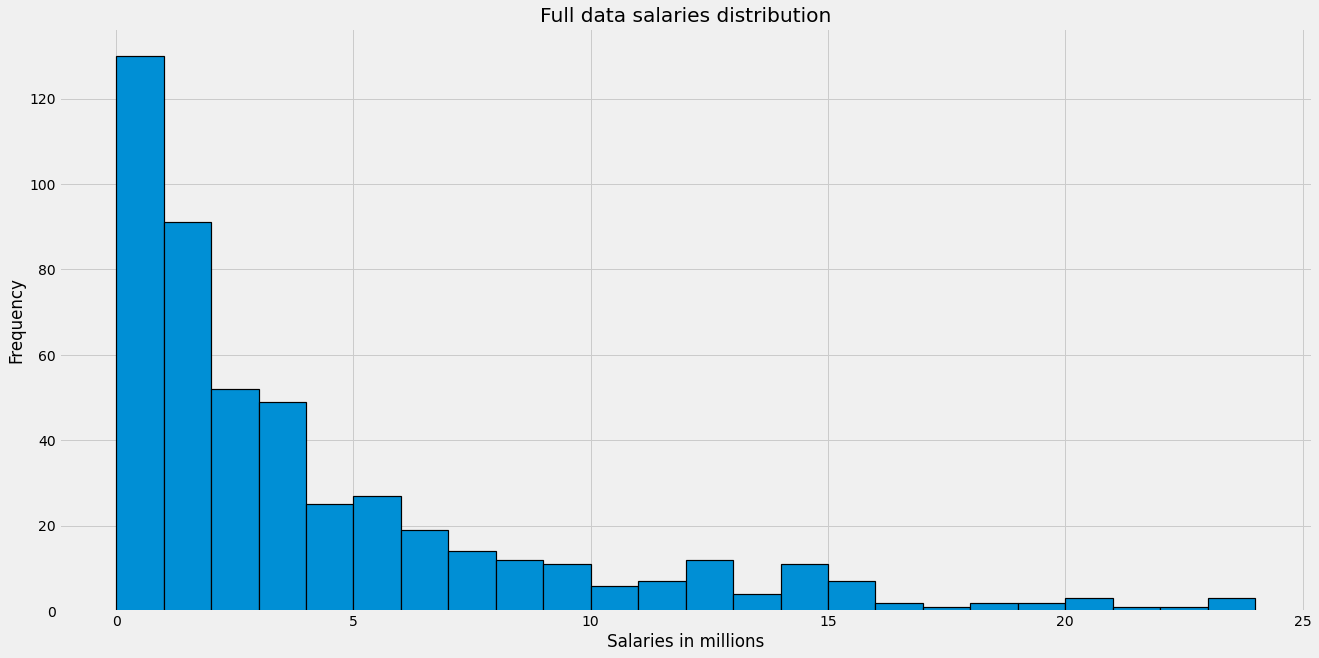

In [ ]:
def salaries_histogram(salaries):
  hist_bins = [x for x in range(int(min(salaries)),int(max(salaries)+2))]
  plt.figure(figsize=(20,10))
  plt.hist(salaries, bins=hist_bins, edgecolor='black', linewidth=1.2)
  plt.title("Full data salaries distribution")
  plt.xlabel("Salaries in millions")
  plt.ylabel("Frequency")
  plt.show()

salaries_histogram(full_data["Salary"])  

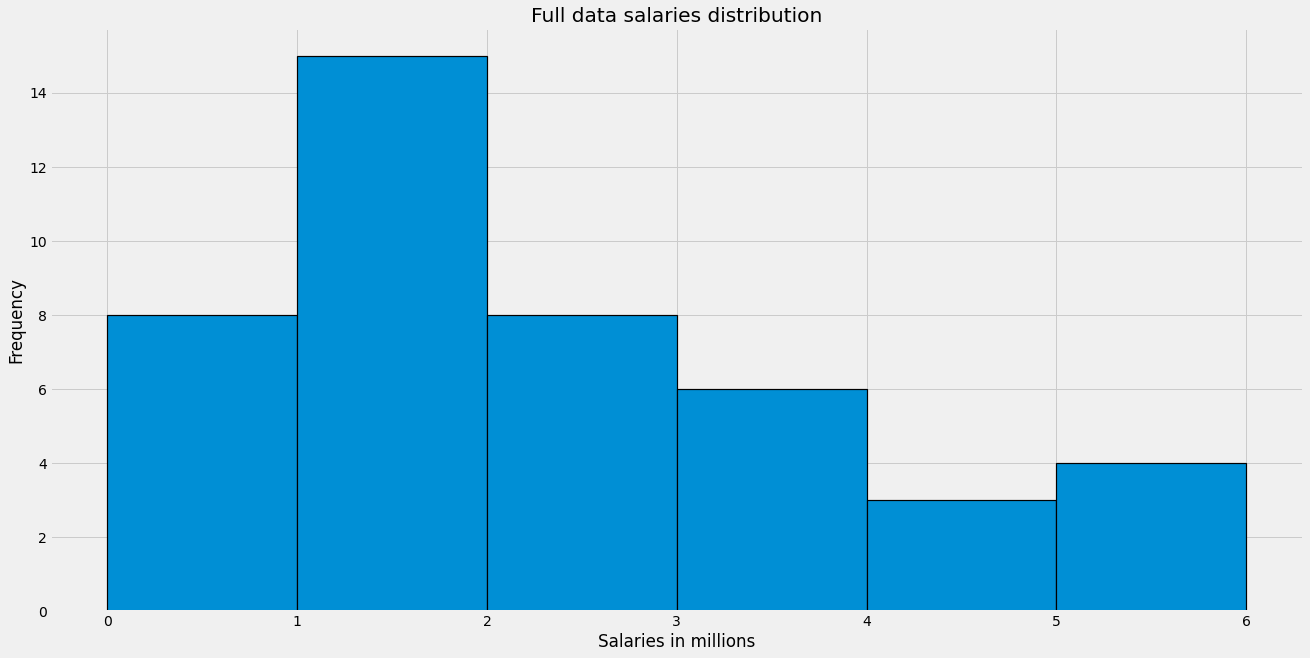

In [ ]:
salaries_histogram(convenience_sample["Salary"])

**Question 5:** Compare the convenience sample salary histogram with the full data salaries histogram. Does the convenience sample give us an accurate picture of the salary of the full population? Would you expect it to, in general? 

*Write your answer here, replacing this text.*

No, the convenience sample salary histogram does not give us an accurate picture of the salary of the full population. First, the range is limited by a lot. The highest salary bucket for convenience sample is 5-6 but 23-24 for full sample. Even the general trend of frequencies do not align well together when we compare the pattern of full sample and the convenience sample. The highest frequency bucket differs in two samples.

### Simple random sampling
A more justifiable approach is to sample uniformly at random from the players.  In a **simple random sample (SRS) without replacement**, we ensure that each player is selected at most once. Imagine writing down each player's name on a card, putting the cards in an box, and shuffling the box.  Then, pull out cards one by one and set them aside, stopping when the specified sample size is reached.

### Producing simple random samples
Sometimes, it’s useful to take random samples even when we have the data for the whole population. It helps us understand sampling accuracy.

### `.sample()`

The DataFrame method `.sample()` produces a random sample from the dataframe. By default, it draws at random **without replacement** from the rows of a table. 

**Question 6:** Produce  3 simple random samples with a of size 45 from `full_data`, plot salary histograms for each one, and answer the following questions:


- How much does the average age change across samples? 
- What about average salary?

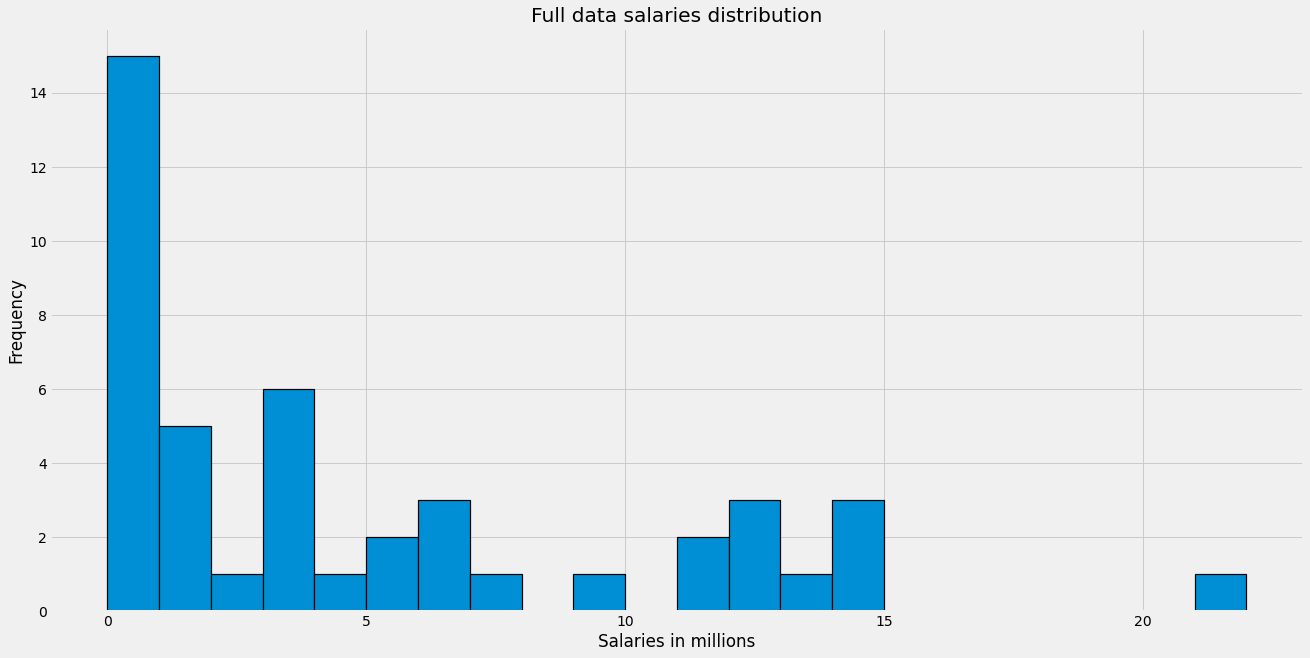

In [ ]:
# This cell should contain your code
random_sample_one = full_data.sample(45)
random_sample_two = full_data.sample(45)
random_sample_three = full_data.sample(45)

salaries_histogram(random_sample_one["Salary"])

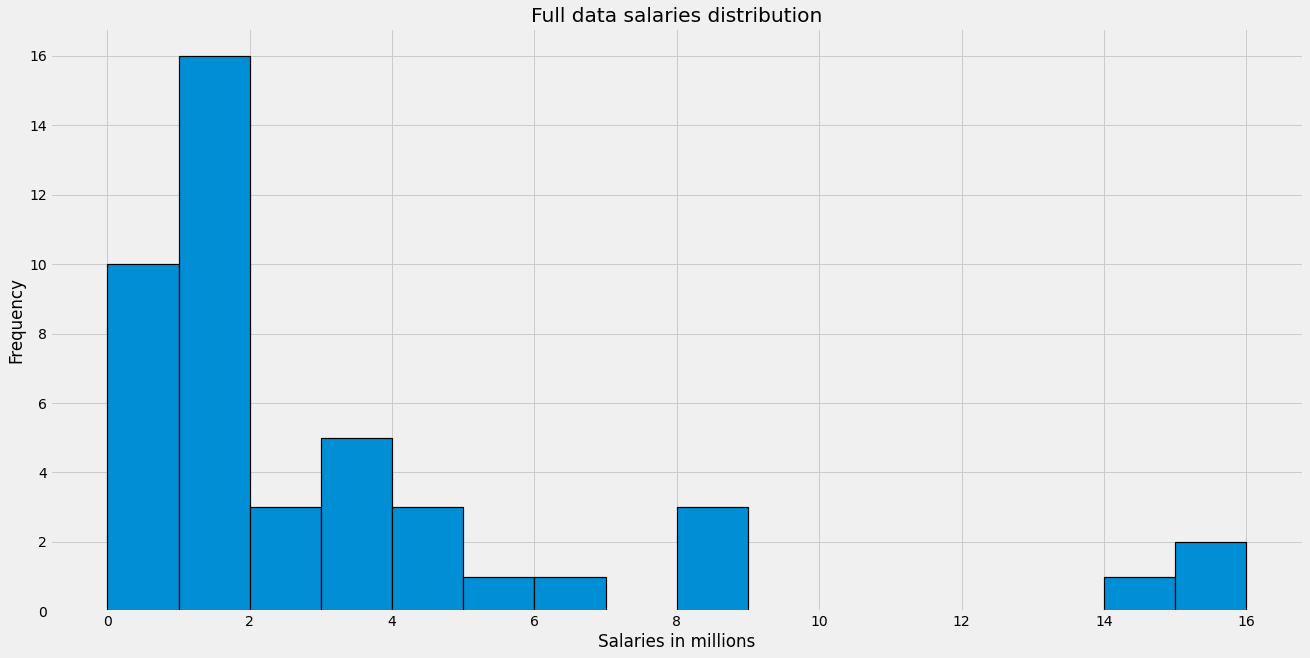

In [ ]:
salaries_histogram(random_sample_two["Salary"])

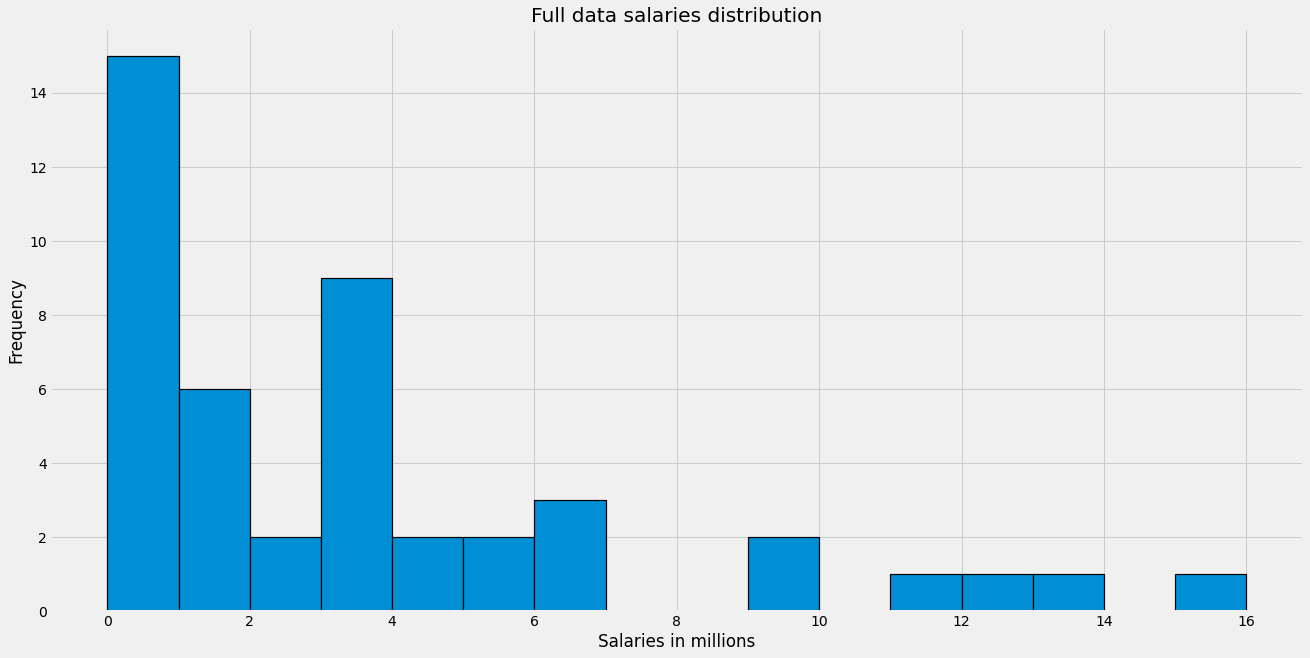

In [ ]:
salaries_histogram(random_sample_three["Salary"])

In [ ]:
print("Average age and salaries for each random sample")
print("Random sample one: ", compute_statistics(random_sample_one))
print("Random sample two: ", compute_statistics(random_sample_two))
print("Random sample three: ", compute_statistics(random_sample_three))
print()
print("Convenience sample: ", compute_statistics(convenience_sample))
print("Full sample: ", compute_statistics(full_data))

Average age and salaries for each random sample
Random sample one:  [26.666666666666668, 5.1304842]
Random sample two:  [26.022222222222222, 3.294378822222222]
Random sample three:  [26.844444444444445, 3.58838148888889]

Convenience sample:  [20.363636363636363, 2.3835338181818178]
Full sample:  [26.536585365853657, 4.269775766260173]


Compared to the convenience sample, all random samples have average age and average salaaries very close to the average age and salary of full data. The random samples are good representatives of the full data.

**Question 7:** As in the previous question, produce 3 simple random samples of size 100 from `full_data`, plot salary histograms for each one and answer the following questions: 
- Do the histogram shapes seem to change more or less across samples of 100 than across samples of size 45?  
- Are the sample averages and histograms closer to their true values/shape for age or for salary?  What did you expect to see?



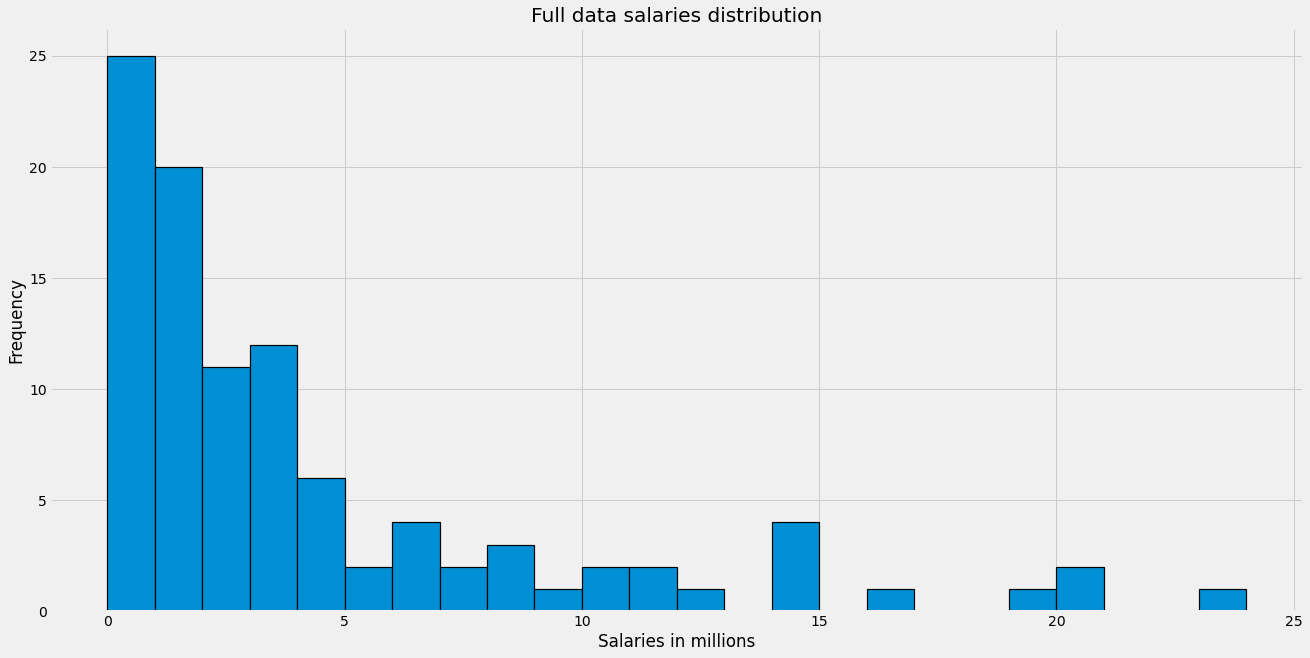

In [ ]:
# This cell should contain your code
random_sample_four = full_data.sample(100)
random_sample_five = full_data.sample(100)
random_sample_six = full_data.sample(100)

salaries_histogram(random_sample_four["Salary"])

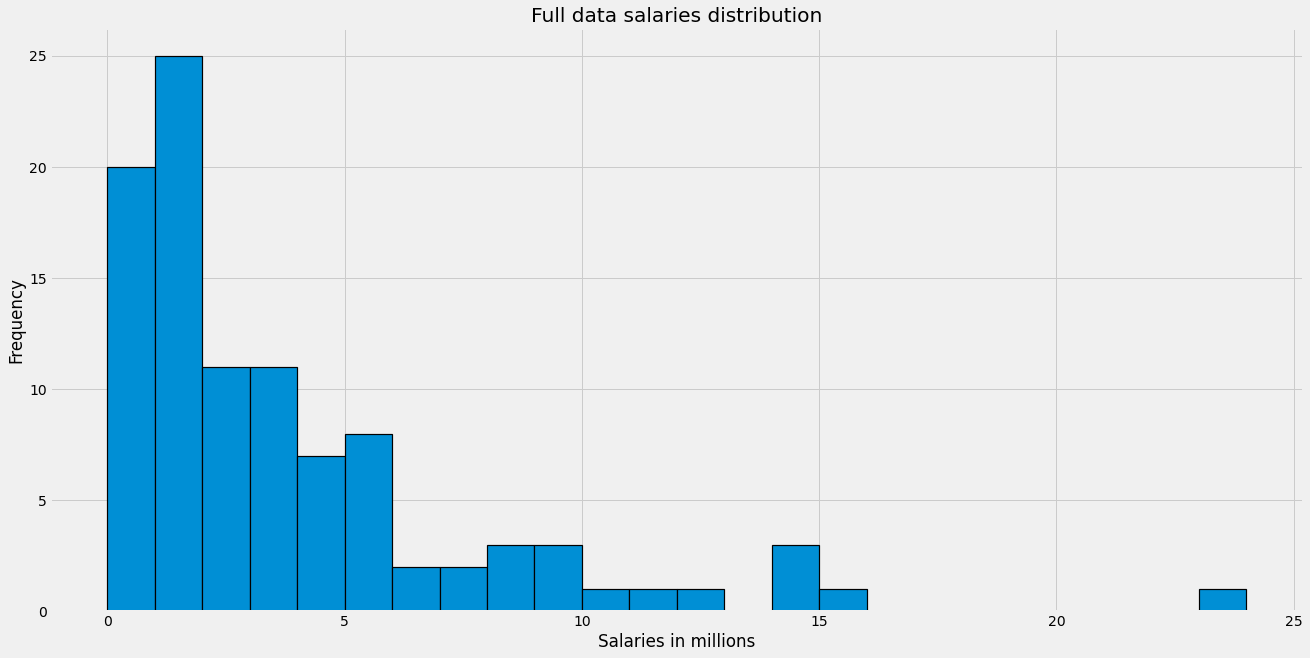

In [ ]:
salaries_histogram(random_sample_five["Salary"])

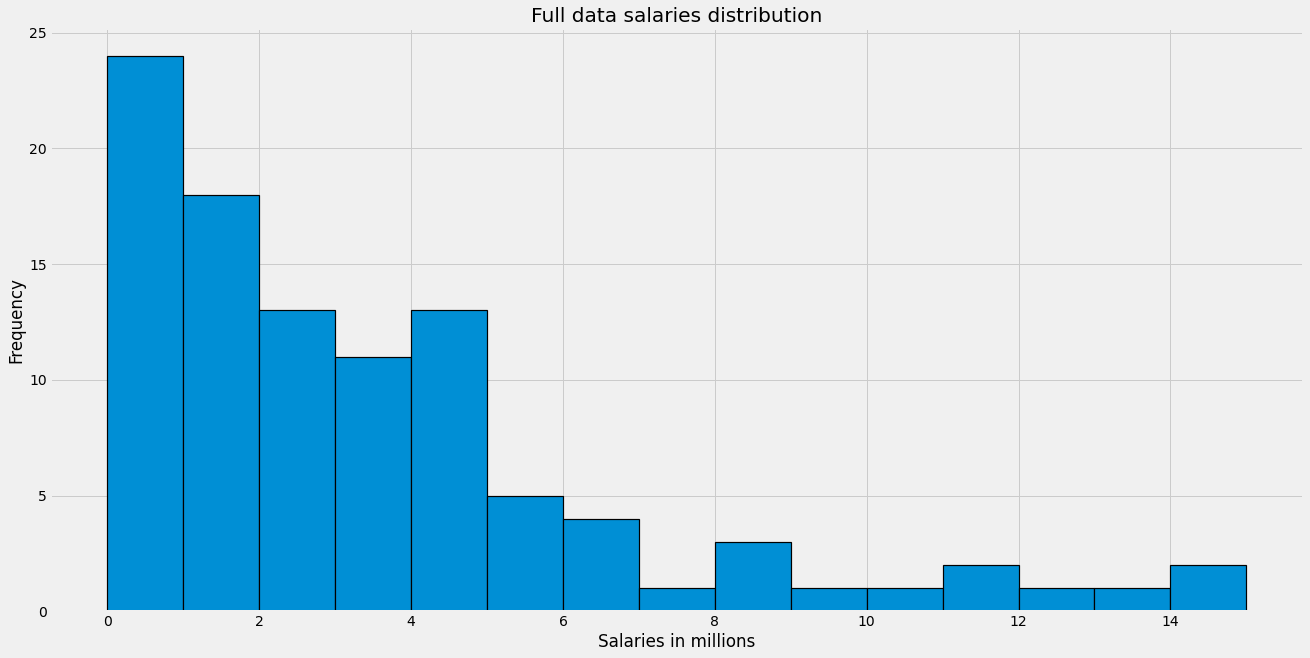

In [ ]:
salaries_histogram(random_sample_six["Salary"])

In [ ]:
print("Average age and salaries for each random sample")
print("Random sample four: ", compute_statistics(random_sample_four))
print("Random sample five: ", compute_statistics(random_sample_five))
print("Random sample six: ", compute_statistics(random_sample_six))
print()
print("Convenience sample: ", compute_statistics(convenience_sample))
print("Full sample: ", compute_statistics(full_data))

Average age and salaries for each random sample
Random sample four:  [26.93, 4.354682350000001]
Random sample five:  [26.38, 3.8379039199999987]
Random sample six:  [26.01, 3.5181272900000016]

Convenience sample:  [20.363636363636363, 2.3835338181818178]
Full sample:  [26.536585365853657, 4.269775766260173]


Answer: The histogram shapes are more consistent across the samples of 100 than when the samples of 45. The histogram shapes are more close to the full sample histogram shape. For larger samples, I expected to see consistent and closer to real values of the average age and average salary. For average age, the consistency and accuracy were more or less similar but  for average salary, there is more consistency across large sample size and the values are closer to actual average salary of the full sample.

### Systematic Sampling

**Systematic sampling** is a type of probability sampling method in which sample members from a larger population are selected according to a random starting point but with a fixed, periodic interval.

**Note:** Since the periodic interval is determined beforehand and the starting point is random, systematic sampling is a kind of *random sampling*

**Question 8:** Write a function called `systematic_sample` that creates a sample from `full_data` systematically, and returns it.

In [ ]:
"""Choose a random start among rows 0 through 9;
then take every 5th row."""

def systematic_sample(table):
    random_start = np.random.randint(low=0, high=10)
    index = 0
    sample = pd.DataFrame(columns=['PlayerName', 'Salary', 'Age', 'Team', 'Games', 'Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers', 'Points'])
    for i in range(random_start, full_data.shape[0], 5):
      sample.loc[index] = table.iloc[i]
      index += 1
    return sample 

systematic_sample_one = systematic_sample(full_data)
systematic_sample_two = systematic_sample(full_data)
systematic_sample_three = systematic_sample(full_data)

**Question 9:** Using the code from above, produce 3 systematic samples from `full_data`, plot salary histograms for each one and answer the following questions:

- Do the 3 histograms created resemble one another, or are they entirely different ?
- How do your histograms compare to the salary histogram from `full_data`

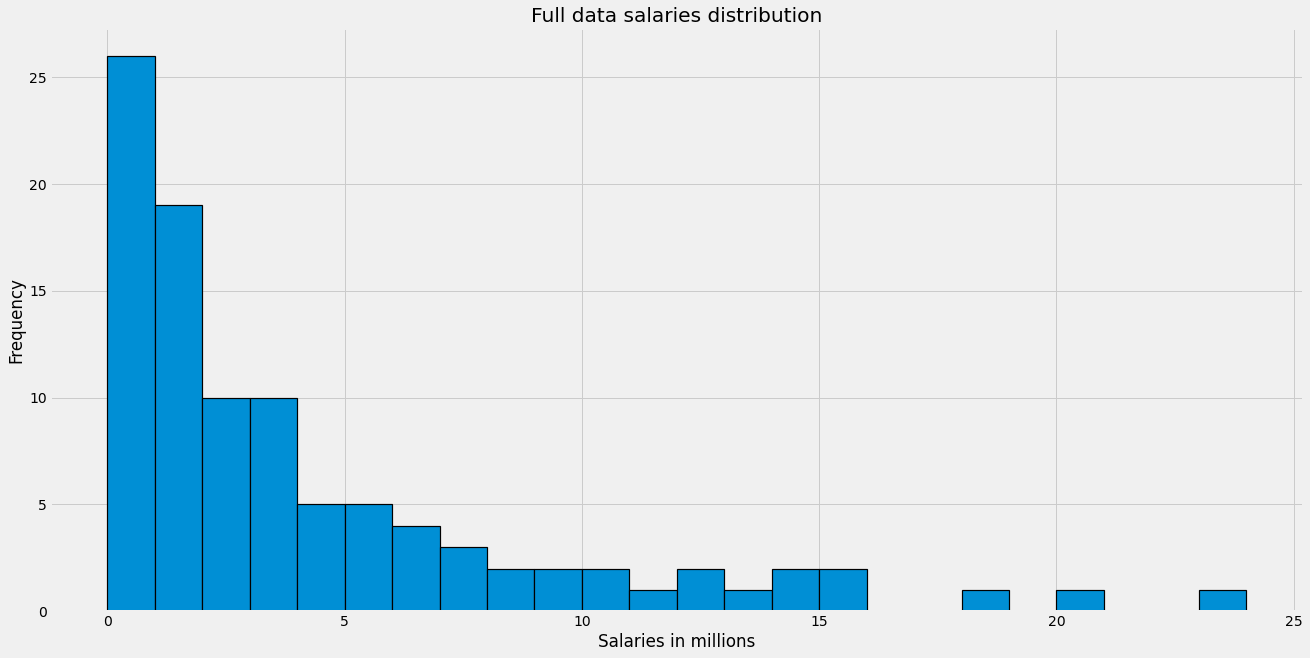

In [ ]:
# This cell should contain your code
salaries_histogram(systematic_sample_one["Salary"])

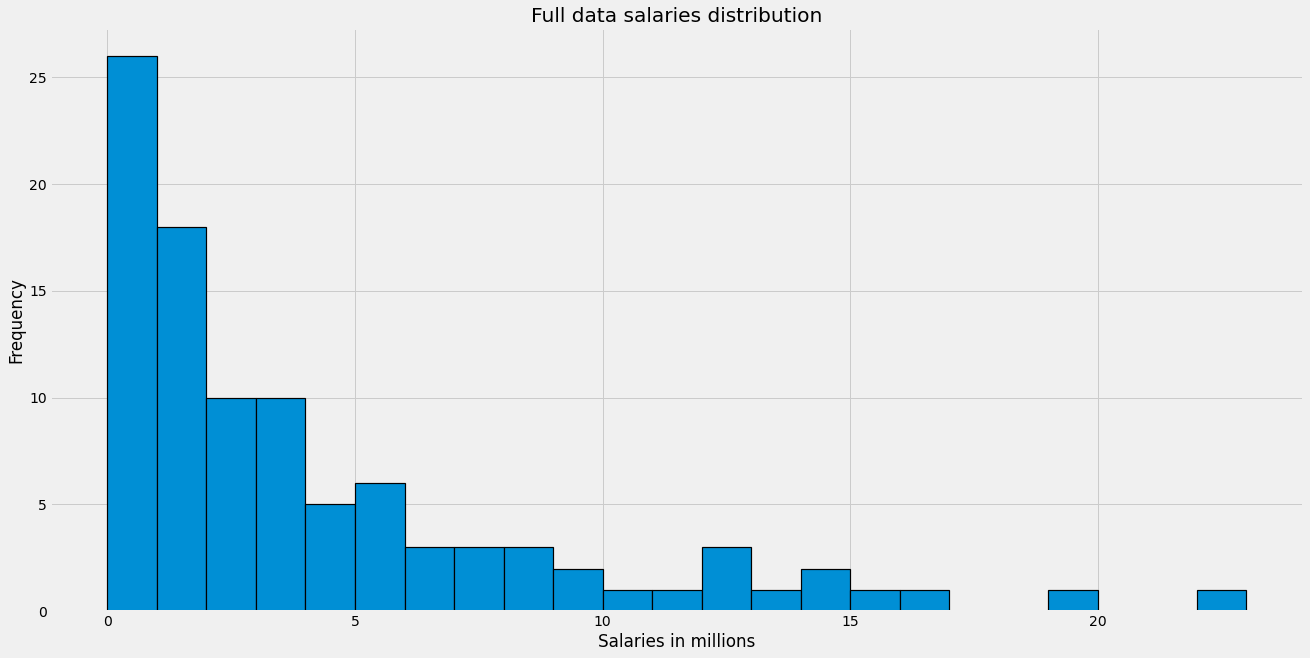

In [ ]:
salaries_histogram(systematic_sample_two["Salary"])

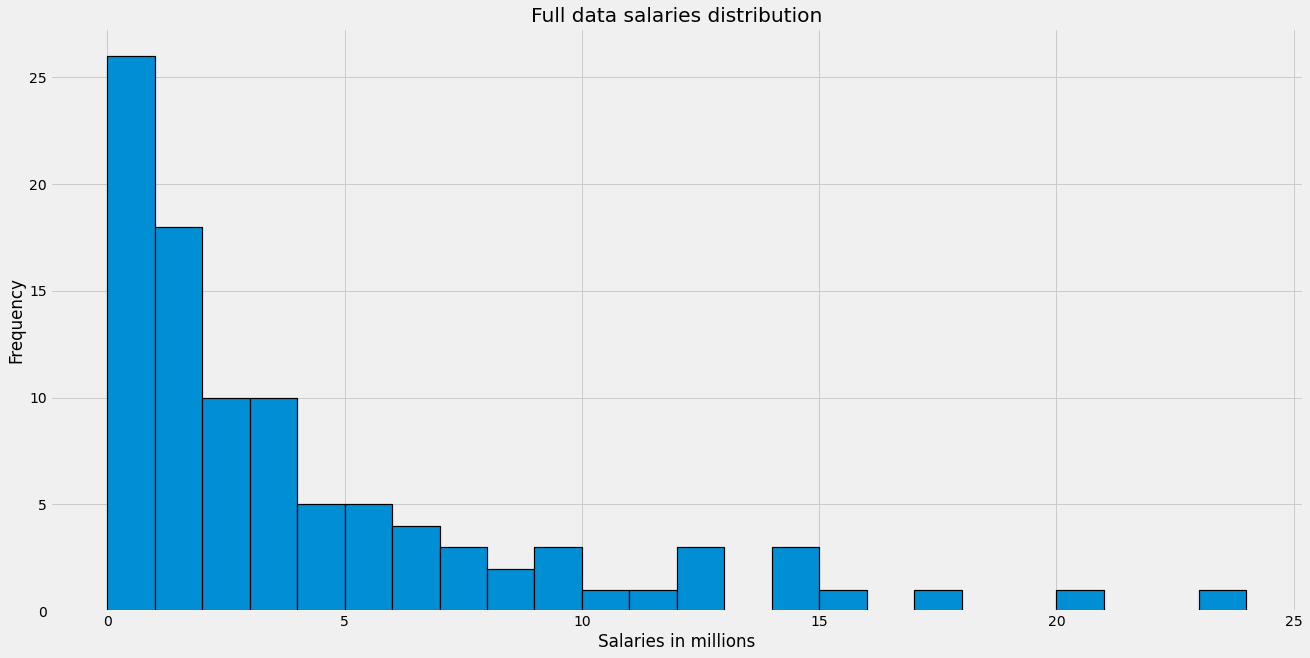

In [ ]:
salaries_histogram(systematic_sample_three["Salary"])

Answer: The three histograms are very consistent with each other as well as the histogram created using the full sample.

## 2. Parameters and Statistics with Earthquakes
The next cell loads a table containing information about **every earthquake with a magnitude above 5** in 2019 (smaller earthquakes are generally not felt, only recorded by very sensitive equipment), compiled by the US Geological Survey. (source: https://earthquake.usgs.gov/earthquakes/search/)

In [ ]:
earthquakes = pd.read_csv('https://raw.githubusercontent.com/prabinspkt/data-science-files/main/earthquakes_2019.csv')
earthquakes = earthquakes.filter(items = ['time', 'mag', 'place'])
earthquakes = earthquakes.rename(columns = {'time':'Time','mag':'Magnitude','place':'Place'})
earthquakes

,Time,Magnitude,Place
0,2019-12-31T11:22:49.734Z,5.0,"245km S of L'Esperance Rock, New Zealand"
1,2019-12-30T17:49:59.468Z,5.0,"37km NNW of Idgah, Pakistan"
2,2019-12-30T17:18:57.350Z,5.5,"34km NW of Idgah, Pakistan"
3,2019-12-30T13:49:45.227Z,5.4,"33km NE of Bandar 'Abbas, Iran"
4,2019-12-30T04:11:09.987Z,5.2,"103km NE of Chichi-shima, Japan"
...,...,...,...
1631,2019-01-02T07:59:50.040Z,5.0,"183km WNW of Abepura, Indonesia"
1632,2019-01-02T03:12:54.750Z,5.0,"71km WSW of Sangiyn Dalay, Mongolia"
1633,2019-01-01T20:24:36.330Z,5.1,"107km SSE of Muara Siberut, Indonesia"
1634,2019-01-01T16:25:36.300Z,5.0,"98km SSE of Habibola, Indonesia"


If we were studying all human-detectable 2019 earthquakes and had access to the above data, we’d be in good shape - however, if the USGS didn’t publish the full data, we could still learn something about earthquakes from just a smaller subsample. If we gathered our sample correctly, we could use that subsample to get an idea about the distribution of magnitudes (above 5, of course) throughout the year!

In the following lines of code, we will compare the parameters of the `earthquakes` mean and median to the respective statistics of two different samples from the `earthquake` table.

**Question 1:** First, start by computing the mean and median magnitudes for the  `earthquakes` dataset.

**Note:** Put your values in an array

In [102]:
# sort and reset index
def find_mean_and_median(earthquakes):
  earthquakes = earthquakes.sort_values(by=["Magnitude"], ascending=True)
  earthquakes = earthquakes.reset_index(drop=True)

  mean_magnitude = sum(earthquakes["Magnitude"]/len(earthquakes["Magnitude"]))
  median_pos = (earthquakes.shape[0]+1)/2
  median_magnitude = earthquakes.iloc[int(median_pos),1] + ((median_pos-int(median_pos)) * (earthquakes.iloc[int(median_pos)+1,1]-earthquakes.iloc[int(median_pos),1]))
  earthquake_mean_and_median = [mean_magnitude, median_magnitude]
  return earthquake_mean_and_median

print("Mean and mediam magnitudes of earthquakes: ", find_mean_and_median(earthquakes))


Mean and mediam magnitudes of earthquakes:  [5.33194987775064, 5.2]


**Question 2:** Write a function that creates a percent distribution histogram for the magnitudes on the `earthquakes` dataset.

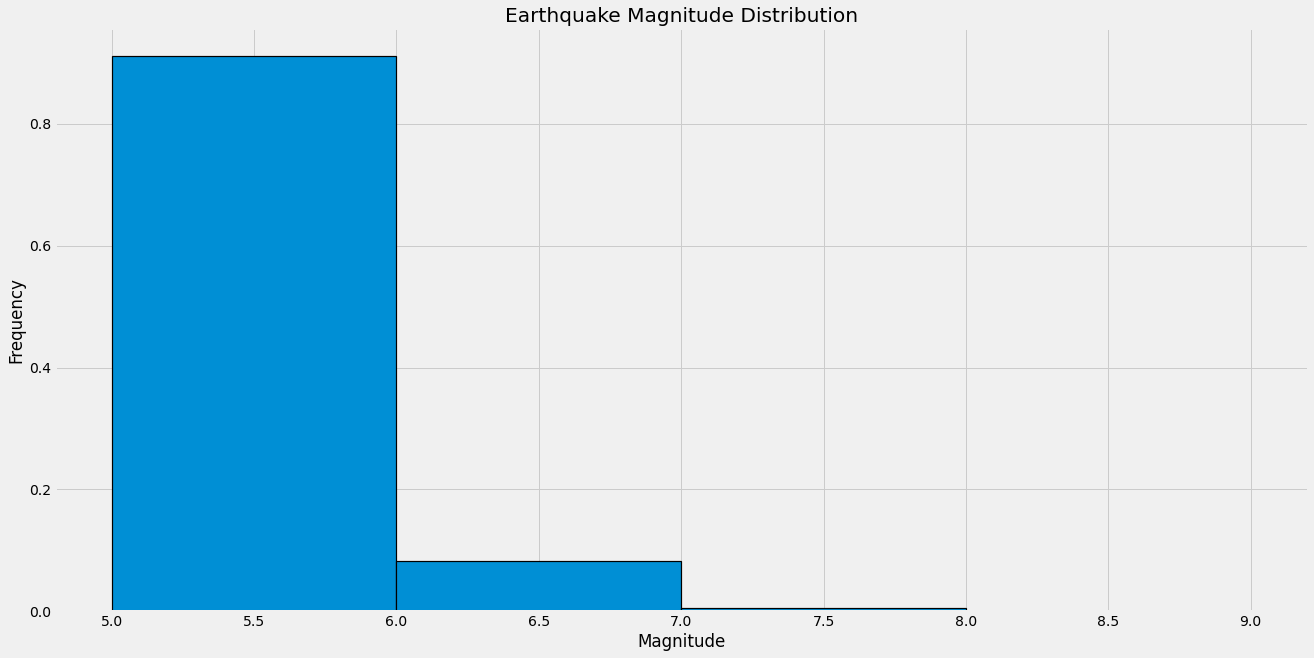

In [96]:
def earthquake_histogram(table):
    magnitudes = table['Magnitude']
    magnitude_bins = np.arange(min(magnitudes), max(magnitudes) + 2, 1) 
    plt.figure(figsize=(20,10))
    plt.hist(table.Magnitude, magnitude_bins, density=True, edgecolor = 'black', linewidth = 1.2) # denisty parameter gives us a relative distribution value
    plt.title('Earthquake Magnitude Distribution')
    plt.xlabel("Magnitude")
    plt.ylabel("Frequency")
    plt.show()
    
earthquake_histogram(earthquakes)

**Question 3:** Take 2 samples with a sampling size of 100 from the earthquakes dataset and store them in tables.

In [97]:
sample1 = earthquakes.sample(n=100)
sample2 = earthquakes.sample(n=100)

**Question 4:** Compute the mean and median magnitudes from your samples, and answer the following questions:
   - How do the mean and median statistics compare to the actual parameter ? Is one sample's set of statistics higher or lower to the actual parameter ?
   
- Which numerical characteristic is better to use in this situation ? The mean or median ? Does it make a difference or not ?

**Note:** Put your values in an array

In [103]:
sample1_mean_and_median = find_mean_and_median(sample1)
sample2_mean_and_median = find_mean_and_median(sample2)

print("Sample1 Mean and mediam magnitudes of earthquakes: ", sample1_mean_and_median)
print("Sample2 Mean and mediam magnitudes of earthquakes: ", sample2_mean_and_median)

Sample1 Mean and mediam magnitudes of earthquakes:  [5.313000000000004, 5.2]
Sample2 Mean and mediam magnitudes of earthquakes:  [5.3420000000000005, 5.2]


Answer:

*   The means of samples are very close to the mean of the total data. The medians of the samples are same/similar to the median of the total data. Currently, sample2's mean is higher than the actual mean.
*   In this particuar case, it should not matter there are not many outliers in the data. Median might have been better if there were outliers as it would ignore the outliers. Median would also be better if there was a general skewness in data.



**Question 5:**  Write a function that simulates taking the mean from "a sample size of 100" **1000** times, stores the computations in an array, and then creates a percent distibution histogram from the array. Then answer the following question:
- Based on the distribution of your means from your simulations, which value appears to occur the most ?
- Does the value that occurs to appear the most within a reasonable range of the actual parameter. Why or why not ?

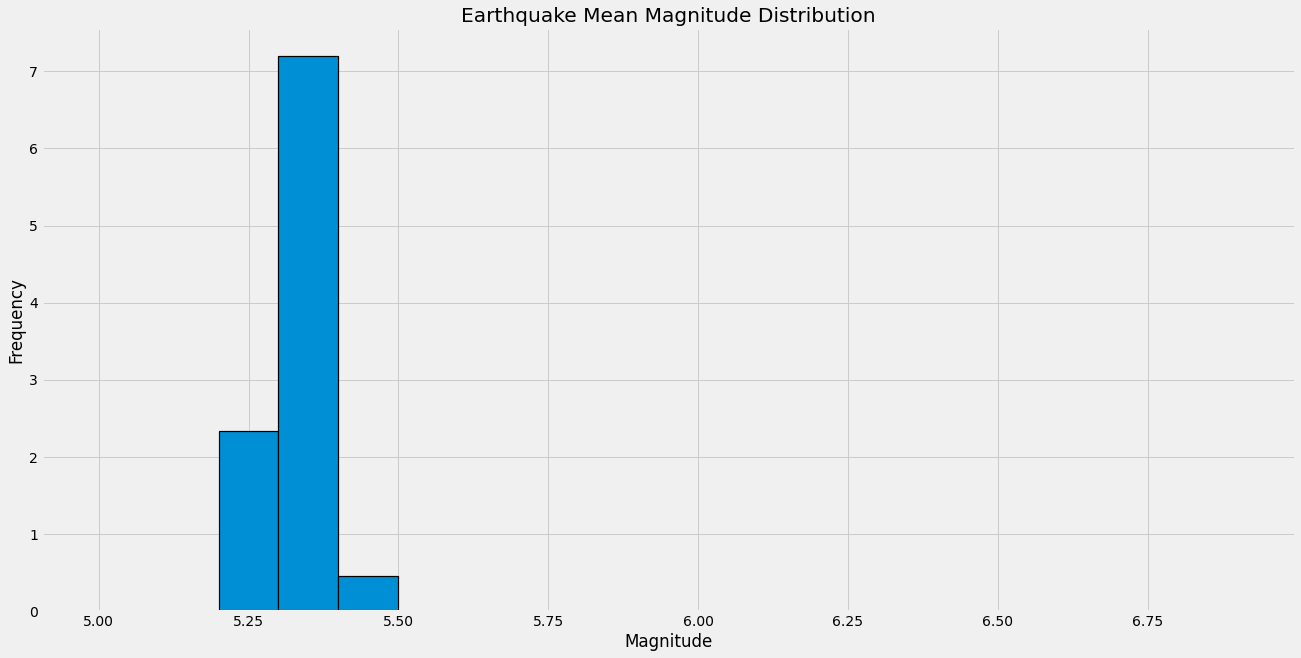

In [110]:
def sample_mean_distribution(table):
  mean_pool = []
  for i in range(1000):
    mean_and_median = find_mean_and_median(table.sample(100))
    mean_pool.append(mean_and_median[0])

  min_mean = int(min(mean_pool))
  max_mean = int(max(mean_pool))+2
  magnitude_bins = np.arange(min_mean, max_mean, 0.1) 
  plt.figure(figsize=(20,10))
  plt.hist(mean_pool, magnitude_bins, density=True, edgecolor = 'black', linewidth = 1.2) # density parameter gives us a relative distribution value
  plt.title('Earthquake Mean Magnitude Distribution')
  plt.xlabel("Magnitude")
  plt.ylabel("Frequency")
  plt.show()
    
sample_mean_distribution(earthquakes)

Answer:
In the above histogram, the magnitudes 5.3-5.4 seem to occur most.

It seems in line with the actual mean value of 5.33 magnitude. Therefore, this highest occuring range of magnitude is a reeasonable range.